# Sentiment analysis : Hidden Markov Chain

_deeplearning.ai/Natural Language Processing Specialization/Probabilistic model_

In [1]:
import re
import pandas as pd
import numpy as np
from collections import Counter

%matplotlib inline
%config InlineBackend.figure_format='svg'

**Implement the function process_data which**

1) Reads in a corpus (text file)

2) Changes everything to lowercase

3) Returns a list of words.

In [2]:
def process_data(file_name):
    """
    Input: 
        A file_name which is found in your current directory. You just have to read it in. 
    Output: 
        words: a list containing all the words in the corpus (text file you read) in lower case. 
    """
    words=[]
    
    with open(file_name) as f:
        file_name_data=f.read()
    file_name_data=file_name_data.lower()
    words=re.findall('\w+',file_name_data)
    
    return words

In [3]:
word_l = process_data('shakespeare.txt')
vocab = set(word_l)  # this will be your new vocabulary
print(f"The first ten words in the text are: \n{word_l[0:10]}")

print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['o', 'for', 'a', 'muse', 'of', 'fire', 'that', 'would', 'ascend', 'the']
There are 6116 unique words in the vocabulary.


**Implement a `get_count function` that returns a dictionary**

The dictionary's keys are words
The value for each word is the number of times that word appears in the corpus

In [4]:
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus. 
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    word_count_dict=dict()
    
    word_count_dict=Counter(word_l)
    
    return word_count_dict

In [5]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 6116 key values pairs
The count for the word 'thee' is 240


Given the dictionary of word counts, compute the probability that each word will appear if randomly selected from the corpus of words.

$$P(w_i) = \frac{C(w_i)}{M} $$
where

$C(w_i)$ is the total number of times $w_i$ appears in the corpus.

$M$ is the total number of words in the corpus.



In [12]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur. 
    '''
    probs={}
    
    m=sum(word_count_dict.values())
    for key,value in word_count_dict.items():
        probs[key]=value/m
        
    return probs

In [13]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('happy') is {probs['happy']:.4f}")

Length of probs is 6116
P('happy') is 0.0003


### String Manipulations
Now, that you have computed $P(w_i)$ for all the words in the corpus, you will write a few functions to manipulate strings so that you can edit the erroneous strings and return the right spellings of the words. In this section, you will implement four functions:

- delete_letter: given a word, it returns all the possible strings that have **one character removed.**
- switch_letter: given a word, it returns all the possible strings that have **two adjacent letters switched.**
- replace_letter: given a word, it returns all the possible strings that have **one character replaced by another different letter.**
- insert_letter: given a word, it returns all the possible strings that have **an additional character inserted.**

Instructions for **delete_letter():** Implement a delete_letter() function that, given a word, returns a list of strings with one character deleted.

For example, given the word nice, it would return the set: {'ice', 'nce', 'nic', 'nie'}.

In [23]:
def delete_letter(word,verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words 
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''
    
    delete_l=[]
    split_l=[]
    
    for c in range(len(word)):
        split_l.append((word[:c],word[c:]))
    
    for a,b in split_l:
        if b:
            delete_l.append(a+b[1:])
    
    if verbose:
        print(f"input word: {word}, \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    
    return delete_l

In [25]:
delete_word_l = delete_letter(word="cans",verbose=True)

input word: cans, 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


**Instructions for switch_letter():** It takes in a word and returns a list of all the possible switches of two letters that are adjacent to each other.

For example, given the word 'eta', it returns {'eat', 'tea'}, but does not return 'ate'.
Step 1: is the same as in delete_letter()
Step 2: A list comprehension or for loop which forms strings by swapping adjacent letters. This is of the form:
[f(L,R) for L, R in splits if condition] where 'condition' will test the length of R in a given iteration

In [31]:
def switch_letter(word,verbose=True):
    '''
    Input:
        word: input string
    Output:
        switches: a list of all possible strings with one adjacent charater switched
    '''
    
    def swap(c,i,j):
        c=list(c)
        c[i],c[j]=c[j],c[i]
        
        return ''.join(c)
    
    switch_l = []
    split_l = []
    
    len_word=len(word)
    
    for c in range(len_word):
        split_l.append((word[:c],word[c:]))
    
    switch_l=[a+b[1]+b[0]+b[2:] for a,b in split_l if len(b) >=2 ]
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}") 

    return switch_l

In [33]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


**Instructions for replace_letter():** 

Step 1: is the same as in delete_letter()

Step 2: A list comprehension or for loop which form strings by replacing letters. This can be of the form:
[f(a,b,c) for a, b in splits if condition for c in string] Note the use of the second for loop.
It is expected in this routine that one or more of the replacements will include the original word. For example, replacing the first letter of 'ear' with 'e' will return 'ear'.

Step 3: Remove the original input letter from the output.

In [34]:
def replace_letter(word,verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word. 
    ''' 
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    
    for c in range(len(word)):
        split_l.append((word[:c],word[c:]))
        
    replace_l = [a + l + (b[1:] if len(b)> 1 else '') for a,b in split_l if b for l in letters]
    replace_set=set(replace_l)    
    replace_set.remove(word)
    
    replace_l = sorted(list(replace_set))
    
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")   

    return replace_l

In [35]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [41]:
# word = 'can'
# replace_ = []
# split_ = []
# letters = 'abcdefghijklmnopqrstuvwxyz'

# for c in range(len(word)):
#     split_.append((word[:c],word[c:]))


# for a,b in split_:
#     if b :
#         for l in letters:
#             if len(b)>1:
#                 replace_.append(a + l + b[1:])
#             else:
#                 replace_.append(a + l + '')

# replace_set=set(replace_)    
# replace_set.remove(word)
# replace_ = sorted(list(replace_set))

# replace_

**Instructions for insert_letter():** Now implement a function that takes in a word and returns a list with a letter inserted at every offset.

Step 1: is the same as in delete_letter()

Step 2: This can be a list comprehension of the form:
[f(a,b,c) for a, b in splits if condition for c in string

In [43]:
def insert_letter(word,verbose=False):
    '''
    Input:
        word: the input string/word 
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    ''' 
    
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    
    for c in range(len(word)+1):
        split_l.append((word[:c],word[c:]))
        
    insert_l=[a+l+b for a,b in split_l for l in letters]
    
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    
    return insert_l

In [44]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


**Instructions: Implement the edit_one_letter function** to get all the possible edits that are one edit away from a word.

In [45]:
def edit_one_letter(word,allow_switches=True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """
    
    edit_one_set=set()
    
    edit_one_set.update(delete_letter(word))
    
    if allow_switches:
        edit_one_set.update(switch_letter(word))
        
    edit_one_set.update(replace_letter(word))
    edit_one_set.update(insert_letter(word))
    
    return edit_one_set

In [46]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

Input word = at 
split_l = [('', 'at'), ('a', 't')] 
switch_l = ['ta']
input word at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

The type of the returned object should be a set <cla

## Dynamic Programming

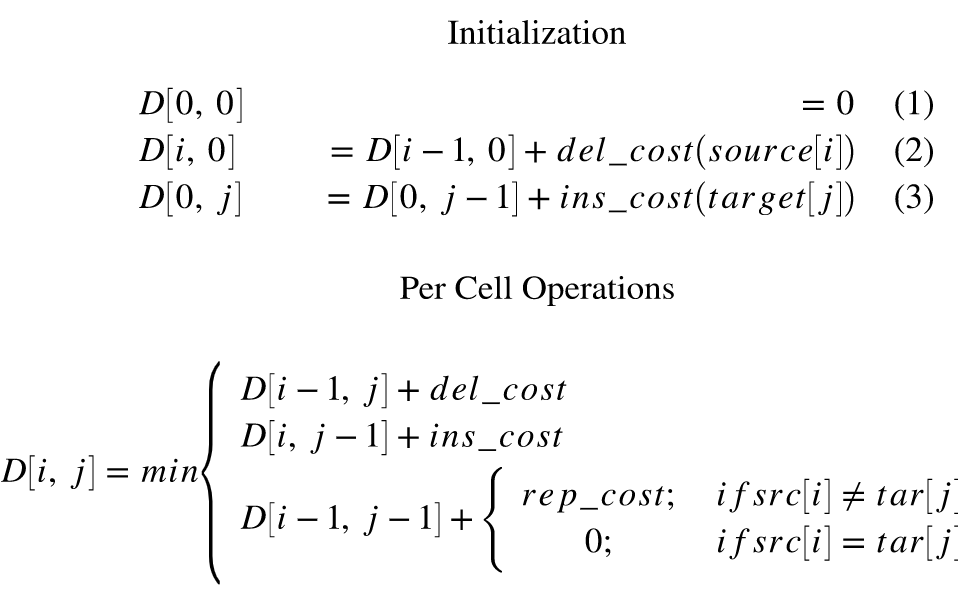

Each entry in D[i,j] represents the minimum cost of converting string source[0:i] to string target[0:j]. The first column is initialized to represent the cumulative cost of deleting the source characters to convert string "EER" to "". The first row is initialized to represent the cumulative cost of inserting the target characters to convert from "" to "NEAR".

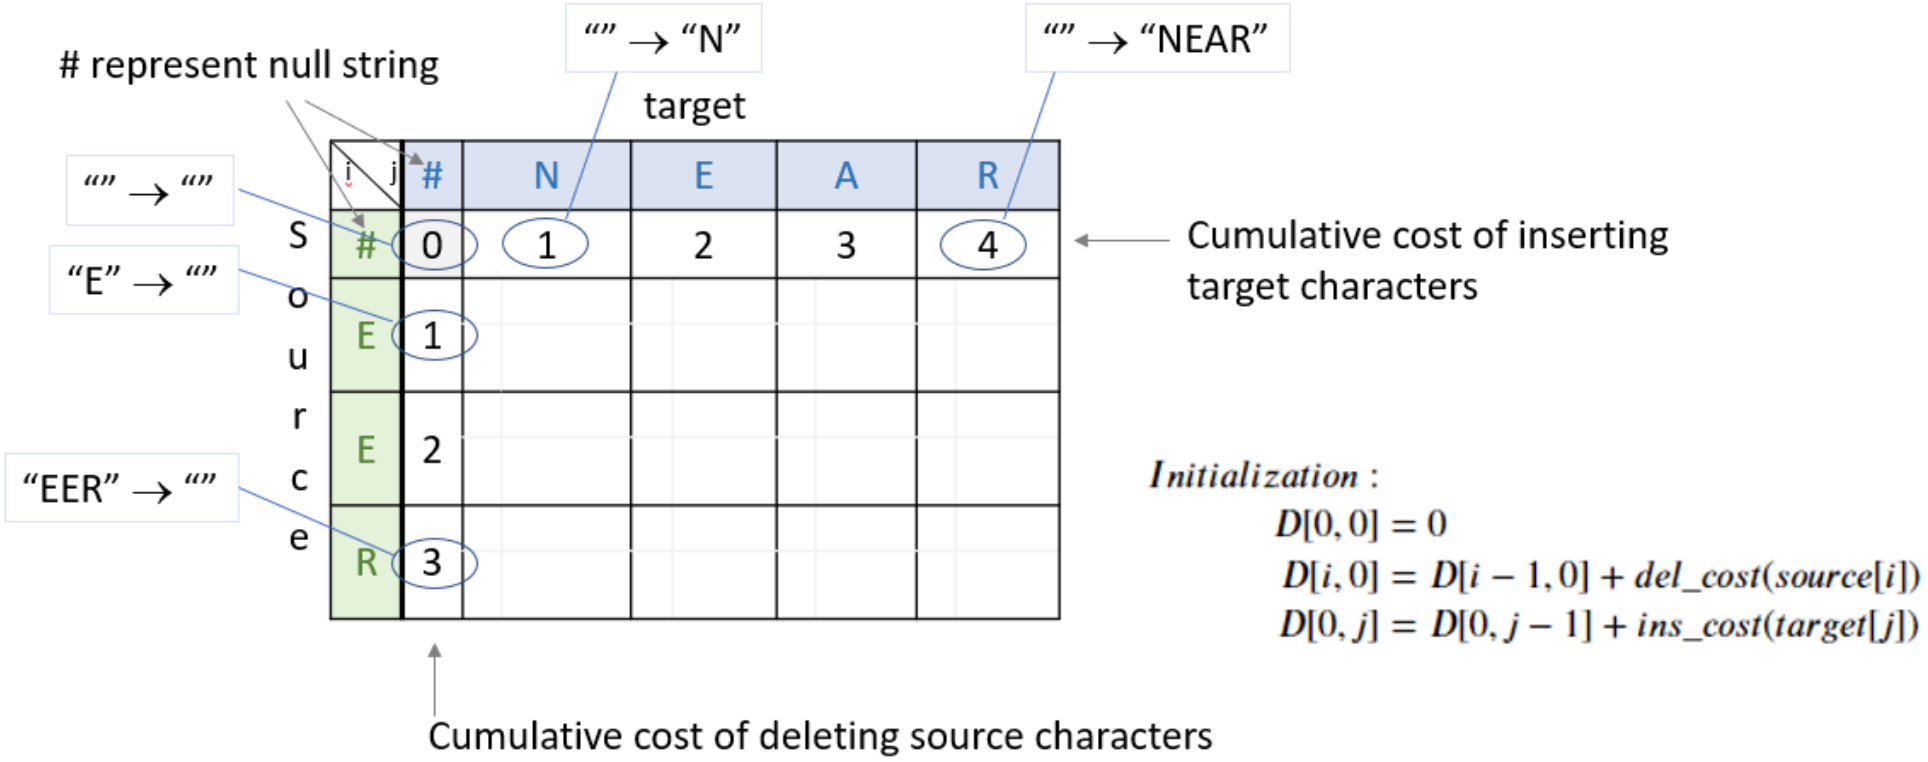

# L2W2 -- POS Tagging

In [49]:
import pandas as pd
import numpy as np
import math
from collections import defaultdict

%matplotlib inline
%config InlineBackend.figure_format='png'

The data sets are collected from the **Wall Street Journal (WSJ).**

[Here](http://relearn.be/2015/training-common-sense/sources/software/pattern-2.6-critical-fork/docs/html/mbsp-tags.html) is an example 'tag-set' or Part of Speech designation describing the two or three letter tag and their meaning

In [50]:
# load in the training corpus
with open("WSJ_02-21.pos","r") as f:
    training_corpus=f.readlines()
    
print(f"A few items of the training corpus list")
print(training_corpus[0:5])

A few items of the training corpus list
['In\tIN\n', 'an\tDT\n', 'Oct.\tNNP\n', '19\tCD\n', 'review\tNN\n']


In [51]:
# read the vocabulary data, split by each line of text, and save the list
with open("hmm_vocab.txt","r") as f:
    voc_l=f.read().split('\n')
    
print("A few items of the vocabulary list")
print(voc_l[0:50])
print()
print("A few items at the end of the vocabulary list")
print(voc_l[-50:])

A few items of the vocabulary list
['!', '#', '$', '%', '&', "'", "''", "'40s", "'60s", "'70s", "'80s", "'86", "'90s", "'N", "'S", "'d", "'em", "'ll", "'m", "'n'", "'re", "'s", "'til", "'ve", '(', ')', ',', '-', '--', '--n--', '--unk--', '--unk_adj--', '--unk_adv--', '--unk_digit--', '--unk_noun--', '--unk_punct--', '--unk_upper--', '--unk_verb--', '.', '...', '0.01', '0.0108', '0.02', '0.03', '0.05', '0.1', '0.10', '0.12', '0.13', '0.15']

A few items at the end of the vocabulary list
['yards', 'yardstick', 'year', 'year-ago', 'year-before', 'year-earlier', 'year-end', 'year-on-year', 'year-round', 'year-to-date', 'year-to-year', 'yearlong', 'yearly', 'years', 'yeast', 'yelled', 'yelling', 'yellow', 'yen', 'yes', 'yesterday', 'yet', 'yield', 'yielded', 'yielding', 'yields', 'you', 'young', 'younger', 'youngest', 'youngsters', 'your', 'yourself', 'youth', 'youthful', 'yuppie', 'yuppies', 'zero', 'zero-coupon', 'zeroing', 'zeros', 'zinc', 'zip', 'zombie', 'zone', 'zones', 'zoning', '{',

In [52]:
# vocab: dictionary that has the index of the corresponding words
vocab={}

# Get the index of the corresponding words:
for i,word in enumerate(sorted(voc_l)):
    vocab[word]=i

    
print("Vocabulary dictionary, key is the word, value is a unique integer")
cnt = 0
for k,v in vocab.items():
    print(f"{k}:{v}")
    cnt += 1
    if cnt > 20:
        break

Vocabulary dictionary, key is the word, value is a unique integer
:0
!:1
#:2
$:3
%:4
&:5
':6
'':7
'40s:8
'60s:9
'70s:10
'80s:11
'86:12
'90s:13
'N:14
'S:15
'd:16
'em:17
'll:18
'm:19
'n':20


In [61]:
import string

# Punctuation characters
punct = set(string.punctuation)

# Morphology rules used to assign unknown word tokens
noun_suffix = ["action", "age", "ance", "cy", "dom", "ee", "ence", "er", "hood", "ion", "ism", "ist", "ity", "ling", "ment", "ness", "or", "ry", "scape", "ship", "ty"]
verb_suffix = ["ate", "ify", "ise", "ize"]
adj_suffix = ["able", "ese", "ful", "i", "ian", "ible", "ic", "ish", "ive", "less", "ly", "ous"]
adv_suffix = ["ward", "wards", "wise"]


def assign_unk(tok):
    """
    Assign unknown word tokens
    """
    # Digits
    if any(char.isdigit() for char in tok):
        return "--unk_digit--"

    # Punctuation
    elif any(char in punct for char in tok):
        return "--unk_punct--"

    # Upper-case
    elif any(char.isupper() for char in tok):
        return "--unk_upper--"

    # Nouns
    elif any(tok.endswith(suffix) for suffix in noun_suffix):
        return "--unk_noun--"

    # Verbs
    elif any(tok.endswith(suffix) for suffix in verb_suffix):
        return "--unk_verb--"

    # Adjectives
    elif any(tok.endswith(suffix) for suffix in adj_suffix):
        return "--unk_adj--"

    # Adverbs
    elif any(tok.endswith(suffix) for suffix in adv_suffix):
        return "--unk_adv--"

    return "--unk--"

In [63]:
def get_word_tag(line, vocab): 
    if not line.split():
        word = "--n--"
        tag = "--s--"
        return word, tag
    else:
        word, tag = line.split()
        if word not in vocab: 
            # Handle unknown words
            word = assign_unk(word)
        return word, tag
    return None 

In [64]:
def create_dictionaries(training_corpus, vocab):
    """
    Input: 
        training_corpus: a corpus where each line has a word followed by its tag.
        vocab: a dictionary where keys are words in vocabulary and value is an index
    Output: 
        emission_counts: a dictionary where the keys are (tag, word) and the values are the counts
        transition_counts: a dictionary where the keys are (prev_tag, tag) and the values are the counts
        tag_counts: a dictionary where the keys are the tags and the values are the counts
    """
    
    # Initialize the dictionaries using defaultdict
    emission_counts=defaultdict(int)
    transition_counts=defaultdict(int)
    tag_counts=defaultdict(int)
    
    # Initialize 'prev_tag' (previous tag) with the start state
    # denoted by '--s--'
    
    prev_tag='--s--'
    
    i=0
    
    # Each item in the training corpus contains a word and its POS tag
    # Go through each word and its tafg in the training corpus
    for word_tag in training_corpus:
        
        i+=1
        
        if i % 50000 == 0:
            print(f'word count = {i}')
        
        word,tag=get_word_tag(word_tag,vocab)
        
        transition_counts[(prev_tag,tag)]+=1
        
        emission_counts[(tag,word)]+=1
        
        tag_counts[tag]+=1
        
        # Set the previous tag to this tag (for the next iteration of the loop)
        prev_tag = tag
        
    return emission_counts, transition_counts, tag_counts

In [65]:
emission_counts, transition_counts, tag_counts = create_dictionaries(training_corpus, vocab)

word count = 50000
word count = 100000
word count = 150000
word count = 200000
word count = 250000
word count = 300000
word count = 350000
word count = 400000
word count = 450000
word count = 500000
word count = 550000
word count = 600000
word count = 650000
word count = 700000
word count = 750000
word count = 800000
word count = 850000
word count = 900000
word count = 950000


In [78]:
states=sorted(tag_counts.keys())
print(f"Number of POS tags (number of 'states'): {len(states)}")
print("View these POS tags (states)")
print(states)


Number of POS tags (number of 'states'): 46
View these POS tags (states)
['#', '$', "''", '(', ')', ',', '--s--', '.', ':', 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']


In [67]:
count = 0
for word_tag in training_corpus:
    if not word_tag.split():
        word = "--n--"
        tag = "--s--"
        print(word, tag)
    else:
        word, tag = word_tag.split()
        if word not in vocab: 
            # Handle unknown words
            word = assign_unk(word)
        print(word, tag)
    count += 1
    if count > 20:
        break
    
    

In IN
an DT
Oct. NNP
19 CD
review NN
of IN
`` ``
The DT
Misanthrope NN
'' ''
at IN
Chicago NNP
's POS
Goodman NNP
Theatre NNP
( (
`` ``
--unk_upper-- VBN
--unk_upper-- NNS
Take VBP
the DT


In [68]:
training_corpus[:20]

['In\tIN\n',
 'an\tDT\n',
 'Oct.\tNNP\n',
 '19\tCD\n',
 'review\tNN\n',
 'of\tIN\n',
 '``\t``\n',
 'The\tDT\n',
 'Misanthrope\tNN\n',
 "''\t''\n",
 'at\tIN\n',
 'Chicago\tNNP\n',
 "'s\tPOS\n",
 'Goodman\tNNP\n',
 'Theatre\tNNP\n',
 '(\t(\n',
 '``\t``\n',
 'Revitalized\tVBN\n',
 'Classics\tNNS\n',
 'Take\tVBP\n']

In [70]:
# load in the test corpus
with open("WSJ_24.pos", 'r') as f:
    y = f.readlines()

print("A sample of the test corpus")
print(y[0:10])

A sample of the test corpus
['The\tDT\n', 'economy\tNN\n', "'s\tPOS\n", 'temperature\tNN\n', 'will\tMD\n', 'be\tVB\n', 'taken\tVBN\n', 'from\tIN\n', 'several\tJJ\n', 'vantage\tNN\n']


In [71]:
def predict_pos(prep,y,emission_counts,vocab,states):
    '''
    Input: 
        prep: a preprocessed version of 'y'. A list with the 'word' component of the tuples.
        y: a corpus composed of a list of tuples where each tuple consists of (word, POS)
        emission_counts: a dictionary where the keys are (tag,word) tuples and the value is the count
        vocab: a dictionary where keys are words in vocabulary and value is an index
        states: a sorted list of all possible tags for this assignment
    Output: 
        accuracy: Number of times you classified a word correctly
    '''
    
    num_corret=0
    
    # Get the (tag,word) tuples stored as set
    all_words=set(emission_counts.keys())
    
    # Get the number of (word,POS) tuples in th corpus y
    total=len(y)
    
    for word,y_tup in zip(prep,y):
        
        # Split the (word,POS) string into a list of towo items
        y_tup_l=y_tup.split()
        
        # Verify the y_tup contain both word and POS
        if len(y_tup_l)==2:
            
            # Set the true POS label for this word
            true_label=y_tup_l[1]
            
        else:
            # If the y_tup didn't contain word and POS
            continue
            
        count_final=0
        pos_final=''
        
        # If the word is in the vocabulary
        if word in vocab:
            
            for pos in states:
                
                # Define the key as the tuple containing the POS and word
                key=(pos,word)
                
                # Check if the (pos,word) key exists in the emission_conuts dictionary
                if key in emission_counts:
                    
                    # Get the emission count of the (pos,word) tuple
                    count=emission_counts[key]
                    
                    # Keep track of the POS with the largest count
                    if count>count_final:
                        
                        # update the final count
                        count_final=count
                        
                        # update the final pos
                        pos_final=pos
                        
            # If the final POS (with the largest count) matches the true POS:            
            if pos_final == true_label:
                
                # update the number of correct predictions
                num_corret+=1
                
    accuracy=num_corret/total
    
    return accuracy

In [72]:
def preprocess(vocab,data_fp):
    """
    Preprocess data
    """
    orig=[]
    prep=[]
    
    with open(data_fp,"r") as data_file:
        
        for cnt,word in enumerate(data_file):
            
            # End of sentence
            if not word.split():
                orig.append(word.strip())
                word='--n--'
                prep.append(word)
                continue
            
            # Handle unk
            elif word.strip() not in vocab:
                orig.append(word.strip())
                word=assign_unk(word)
                prep.append(word)
                continue
            
            else:
                orig.append(word.strip())
                prep.append(word.strip())
                
    assert(len(orig) == len(open(data_fp, "r").readlines()))
    assert(len(prep) == len(open(data_fp, "r").readlines()))

    return orig, prep

In [76]:
#corpus without tags, preprocessed
_, prep = preprocess(vocab, "test.words.txt")     

print('The length of the preprocessed test corpus: ', len(prep))
print('This is a sample of the test_corpus: ')
print(prep[0:10])

The length of the preprocessed test corpus:  34199
This is a sample of the test_corpus: 
['The', 'economy', "'s", 'temperature', 'will', 'be', 'taken', 'from', 'several', '--unk--']


In [79]:
accuracy_predict_pos = predict_pos(prep, y, emission_counts, vocab, states)
print(f"Accuracy of prediction using predict_pos is {accuracy_predict_pos:.4f}")

Accuracy of prediction using predict_pos is 0.8889


In [86]:
with open('test.words.txt',"r") as data_file:
        count = 0
        for cnt,word in enumerate(data_file):
            count += 1
            print(cnt,word)
            if count > 10:
                break

0 The

1 economy

2 's

3 temperature

4 will

5 be

6 taken

7 from

8 several

9 vantage

10 points



### Create 'A' matrix : Transition matrix

The smoothing was done as follows:


$$ P(t_i | t_{i-1}) = \frac{C(t_{i-1}, t_{i}) + \alpha }{C(t_{i-1}) +\alpha * N}$$
 
$N$ is the total number of tags

$C(t_{i-1}, t_{i})$ is the count of the tuple (previous POS, current POS) in transition_counts dictionary.

$C(t_{i-1})$ is the count of the previous POS in the tag_counts dictionary.

$\alpha$ is a smoothing parameter.

In [92]:
def create_transition_matrix(alpha, tag_counts, transition_counts):
    ''' 
    Input: 
        alpha: number used for smoothing
        tag_counts: a dictionary mapping each tag to its respective count
        transition_counts: transition count for the previous word and tag
    Output:
        A: matrix of dimension (num_tags,num_tags)
    '''
    
    # Get a sorted list of unique POS tags
    all_tags = sorted(tag_counts.keys())
    
    # Get the number of unique POS tags
    num_tags = len(all_tags)
    
    # Initialize the transition matrix 'A'
    A = np.zeros((num_tags,num_tags))
    
    # Get the unique transition tuples (previous POS,current POS)
    trains_keys=set(transition_counts.keys())
    
    for i in range(num_tags):
        
        for j in range(num_tags):
        
            count=0

            # Get the tag as position i and tag at position j (from the all_tags list)
            key = (all_tags[i],all_tags[j])

            # exists in the transition counts dictionary
            if key in transition_counts:

                # for the (prev POS , current POS) tuple
                count = transition_counts[key]

            # Get the count of the previous tag (index postion i) from tag_counts
            count_prev_tag = tag_counts[all_tags[i]]

            # Apply smoothing using count of the tuple , alpha
            # count of previous tag, alpha, and the number of total tags
            A[i,j] = (count + alpha) / (count_prev_tag +alpha*num_tags)
        
    return A

In [93]:
alpha = 0.001
for i in range(46):
    tag_counts.pop(i,None)

A = create_transition_matrix(alpha, tag_counts, transition_counts)
# Testing your function
print(f"A at row 0, col 0: {A[0,0]:.9f}")
print(f"A at row 3, col 1: {A[3,1]:.4f}")

#print("View a subset of transition matrix A")
A_sub = pd.DataFrame(A[30:35,30:35], index=states[30:35], columns = states[30:35] )
print(A_sub)

A at row 0, col 0: 0.000007040
A at row 3, col 1: 0.1691
              RBS            RP           SYM        TO            UH
RBS  2.217069e-06  2.217069e-06  2.217069e-06  0.008870  2.217069e-06
RP   3.756509e-07  7.516775e-04  3.756509e-07  0.051089  3.756509e-07
SYM  1.722772e-05  1.722772e-05  1.722772e-05  0.000017  1.722772e-05
TO   4.477336e-05  4.472863e-08  4.472863e-08  0.000090  4.477336e-05
UH   1.030439e-05  1.030439e-05  1.030439e-05  0.061837  3.092348e-02


### Create the 'B' emission probabilities matrix

The smoothing was done as follows:

$$ P(w_i | t_{i}) = \frac{C(word_{i}, t_{i}) + \alpha }{C(t_{i}) +\alpha * N}$$

 
 
$C(t_i, word_i)$ is the number of times $word_i$ was associated with $tag_i$ in the training data (stored in emission_counts dictionary).

$C(t_i)$ is the number of times $tag_i$ was in the training data (stored in tag_counts dictionary).

$N$ is the number of words in the vocabulary

$\alpha$ is a smoothing parameter.

In [95]:
def create_emission_matrix(alpha, tag_counts, emission_counts, vocab):
    '''
    Input: 
        alpha: tuning parameter used in smoothing 
        tag_counts: a dictionary mapping each tag to its respective count
        emission_counts: a dictionary where the keys are (tag, word) and the values are the counts
        vocab: a dictionary where keys are words in vocabulary and value is an index
    Output:
        B: a matrix of dimension (num_tags, len(vocab))
    '''
    
    # Get the number of POS tag
    num_tags=len(tag_counts)
    
    # Get a list of all POS tags
    all_tags=sorted(tag_counts.keys())
    
    # Get the total number of unique words in the vocabulary
    num_words=len(vocab)
    
    # Initialize the emission matrix B with places for 
    # tags in the rows and words in the columns
    B = np.zeros((num_tags,num_words))
    
    # Get a set of all (POS,word) tuples
    # from the keys of the emisson_counts dictionary
    emis_keys=set(list(emission_counts.keys()))
    
    for i in range(num_tags):
        
        for j in range(num_words):
            
            count=0
            
            # Define the (POS tag,word) tuple for this row and column
            key = (all_tags[i],vocab[j])
            
            # Check if the (POS tag,word) tuple exists as a key in emission counts
            if key in emission_counts.keys():
                
                # Get the count of (POS tag,word) from the emission_counts
                count = emission_counts[key]
                
            # Get the count of the POS tag
            count_tag = tag_counts[all_tags[i]]
            
            # Apply smoothing and store the smoothed value 
            # into the emission matrix B for this row and column
            B[i,j]=(count + alpha)/(count_tag+alpha*num_words)
            
    return B

In [96]:
# creating your emission probability matrix. this takes a few minutes to run. 
for i in range(46):
    tag_counts.pop(i,None)

B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocab))

print(f"View Matrix position at row 0, column 0: {B[0,0]:.9f}")
print(f"View Matrix position at row 3, column 1: {B[3,1]:.9f}")

# Try viewing emissions for a few words in a sample dataframe
cidx  = ['725','adroitly','engineers', 'promoted', 'synergy']

# Get the integer ID for each word
cols = [vocab[a] for a in cidx]

# Choose POS tags to show in a sample dataframe
rvals =['CD','NN','NNS', 'VB','RB','RP']

# For each POS tag, get the row number from the 'states' list
rows = [states.index(a) for a in rvals]

# Get the emissions for the sample of words, and the sample of POS tags
B_sub = pd.DataFrame(B[np.ix_(rows,cols)], index=rvals, columns = cidx )
print(B_sub)

View Matrix position at row 0, column 0: 0.000006032
View Matrix position at row 3, column 1: 0.000000720
              725      adroitly     engineers      promoted       synergy
CD   8.201296e-05  2.732854e-08  2.732854e-08  2.732854e-08  2.732854e-08
NN   7.521128e-09  7.521128e-09  7.521128e-09  7.521128e-09  2.257091e-05
NNS  1.670013e-08  1.670013e-08  4.676203e-04  1.670013e-08  1.670013e-08
VB   3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08  3.779036e-08
RB   3.226454e-08  6.456135e-05  3.226454e-08  3.226454e-08  3.226454e-08
RP   3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07  3.723317e-07
